In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [2]:
# 데이터 로드
data = pd.read_csv('../data/Training/train_data.csv').drop(['site','sid'],axis=1)
data

,ldate,lrate,llevel,leaktype,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
0,20200708,90,256,out,0,18,19,16,20,19,...,4690,243,4710,284,4700,324,4670,230,4710,260
1,20190601,90,542,out,0,4,2,4,6,4,...,310,423,300,711,270,412,270,531,290,538
2,20201028,90,705,out,0,0,0,3,3,3,...,240,751,240,897,240,741,240,741,240,562
3,20200505,90,499,out,0,2,2,2,2,2,...,370,549,360,427,370,800,370,552,370,458
4,20200520,90,423,out,0,3,3,3,3,3,...,400,521,400,395,400,461,400,470,400,515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62559,20200722,30,283,normal,0,4,3,3,4,4,...,190,44,260,60,190,32,260,439,260,77
62560,20200611,40,164,normal,0,4,4,5,4,4,...,260,196,260,65,260,52,260,38,260,58
62561,20200827,70,162,normal,0,4,4,4,5,5,...,310,147,290,162,290,226,290,171,310,98
62562,20200726,30,159,normal,0,4,5,5,5,5,...,390,58,380,94,380,61,380,133,380,67


In [3]:
# 데이터 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62564 entries, 0 to 62563
Columns: 537 entries, ldate to MAX19
dtypes: int64(536), object(1)
memory usage: 256.3+ MB


In [4]:
# 통계량 및 전체 데이터 통계량
all = data.describe().drop('count',axis=0)
all

,ldate,lrate,llevel,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
mean,2.020076e+07,75.931526,447.207228,0.0,5.305719,5.583562,5.943482,6.340084,6.768062,11.076642,...,511.05492,413.370804,505.911547,413.052426,506.957356,412.666709,513.520235,413.740873,511.642958,411.035420
std,5.816738e+03,22.210028,240.240117,0.0,5.699169,6.325584,7.180028,8.261700,9.520785,53.026483,...,821.25583,285.865414,808.999371,286.484312,810.835384,286.436706,824.983970,287.399663,819.483059,287.275671
min,2.019023e+07,30.000000,112.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,30.00000,9.000000,30.000000,9.000000,30.000000,9.000000,30.000000,9.000000,30.000000,9.000000
25%,2.020042e+07,60.000000,239.000000,0.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,260.00000,168.000000,260.000000,167.000000,260.000000,167.000000,260.000000,166.000000,260.000000,166.000000
50%,2.020080e+07,90.000000,400.000000,0.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,310.00000,366.000000,310.000000,366.000000,310.000000,366.000000,310.000000,368.000000,310.000000,363.000000
75%,2.020120e+07,90.000000,615.000000,0.0,5.000000,5.000000,6.000000,6.000000,6.000000,7.000000,...,380.00000,612.000000,380.000000,612.000000,380.000000,614.000000,390.000000,616.000000,390.000000,612.000000
max,2.021021e+07,90.000000,1650.000000,0.0,83.000000,146.000000,125.000000,196.000000,322.000000,1221.000000,...,4990.00000,1656.000000,5000.000000,1723.000000,5000.000000,1698.000000,5000.000000,1717.000000,5000.000000,1710.000000


In [5]:
# leaktype 레이블 5개로 나눔
out = data[data['leaktype'] == 'out']
in_ = data[data['leaktype'] == 'in']
noise = data[data['leaktype'] == 'noise']
other = data[data['leaktype'] == 'other']
normal = data[data['leaktype'] == 'normal']

In [6]:
# 주파수 진동 수치
"""
160hz에서 550hz 사이가 가장 진동크기가 강해서 중간 주파수 대역만 분리했다.
""" 
out_mean = out.iloc[:,20:60].mean()
in_mean = in_.iloc[:,20:60].mean()
noise_mean = noise.iloc[:,20:60].mean()
other_mean = other.iloc[:,20:60].mean()
normal_mean = normal.iloc[:,20:60].mean()

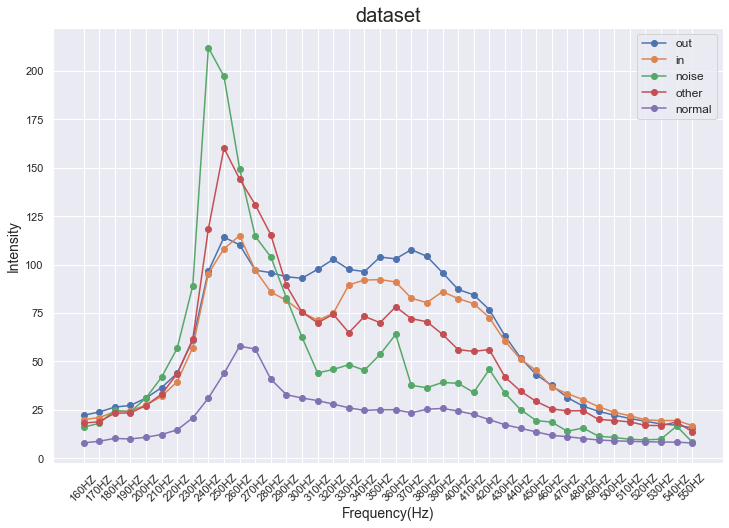

In [7]:
plt.figure(figsize=(12,8)) # 캔버스 크기 지정

# 주파수 x축, 진동크기 y축
plt.plot(out_mean.index, out_mean.values, marker='o', label='out')
plt.plot(in_mean.index, in_mean.values, marker='o', label='in')
plt.plot(noise_mean.index, noise_mean.values, marker='o', label='noise')
plt.plot(other_mean.index, other_mean.values, marker='o', label='other')
plt.plot(normal_mean.index, normal_mean.values, marker='o', label='normal')

plt.title('dataset', fontsize=20) 
plt.ylabel('Intensity', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('Frequency(Hz)', fontsize=14)

plt.legend(fontsize=12, loc='best')

plt.show()

In [8]:
# 누수감지 횟수별 감지정보 데이터

out_mean1 = out.iloc[:,517:].mean()
in_mean1 = in_.iloc[:,517:].mean()
noise_mean1 = noise.iloc[:,517:].mean()
other_mean1 = other.iloc[:,517:].mean()
normal_mean1 = normal.iloc[:,517:].mean()

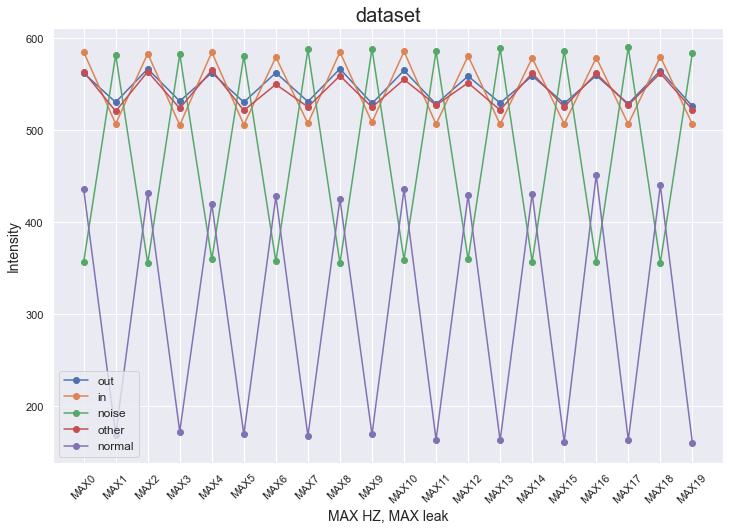

In [9]:
# 최대 주파수 및 최대 누수 평균 수치
"""
x축의 MAX짝수는 최대 주파수이고, MAX홀수는 최대 누수이다.
y축은 평균값을 나타낸 수치이다.
최대 주파수 수치는 noise -> normal -> other -> out -> in 순서로 주파수 대역이 높아진다.
최대 누수 수치는 normal -> in -> other -> out -> noise 순서로 누수크기가 높아진다.
"""
plt.figure(figsize=(12,8)) # 캔버스 크기 지정

plt.plot(out_mean1.index, out_mean1.values, marker='o', label='out')
plt.plot(in_mean1.index, in_mean1.values, marker='o', label='in')
plt.plot(noise_mean1.index, noise_mean1.values, marker='o', label='noise')
plt.plot(other_mean1.index, other_mean1.values, marker='o', label='other')
plt.plot(normal_mean1.index, normal_mean1.values, marker='o', label='normal')

plt.title('dataset', fontsize=20) 
plt.ylabel('Intensity', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('MAX HZ, MAX leak', fontsize=14)

plt.legend(fontsize=12, loc='best')

plt.show()

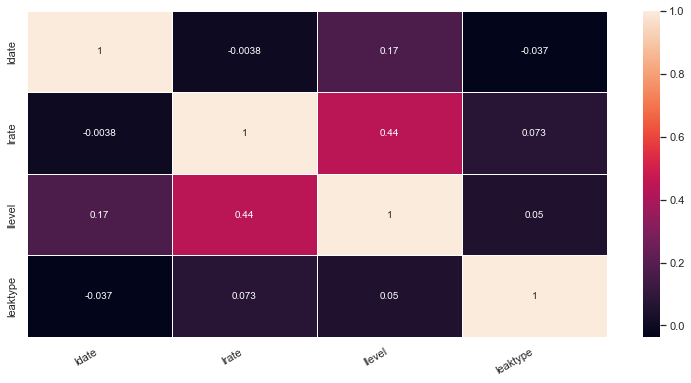

In [10]:
# 변수 간의 상관관계
"""
분석결과 llevel과 lrate이 상관관계가 높다는걸
heatmap을 통해 알 수 있다.
"""
data['leaktype'] = le.fit_transform(data['leaktype'])
data.describe().drop('count',axis=0)

corrmat = data.iloc[:,:4].corr()

plt.figure(figsize=(13, 6))
sns.heatmap(corrmat, vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

```
데이터 독립 변수와 종속 변수 분석 결과 lrate(누수확율)은 normal(정상음)을 제외한 나머지 소리는 전부 90프로 이상 누수가 발생되고,
평균적으로 140hz에서 530hz 사이의 주파수에서 누수 진동 크기가 가장 많이 발생한다는 것을 알 수 있다.
그리고 최대 감지 주파수는 350hz~600hz 사이가 평균이고, 최대 누수 크기는 normal(정상음)을 제외하고 500~600 사이로 비슷하다.
또한 평균적으로 out(옥외누수), in(옥내누수), other(환경음)은 감지되는 최대 주파수와 최대 누수크기의 수치가 아주 가깝다는 분석 결과를 도출했다.
결과적으로 sid, site 변수는 감지 기계와 사이트 번호라는 의미없는 데이터라 삭제하고
ldate 변수는 다른 변수와의 상관관계가 매우 낮아서 학습시 제거한다.
```

<AxesSubplot:xlabel='lrate', ylabel='llevel'>

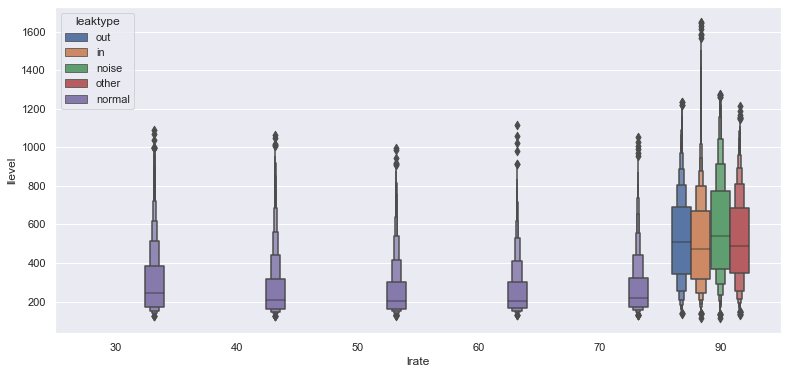

In [11]:
# lrate, llevel 데이터를 통해 이상치 분석 및 누수확률별 누수크기 비교
"""
정상음(normal)을 제외하고 나머지 leaktype은 데이터상 전부 90퍼센트 이상 누수확율 발생
정상음도 70퍼센트 이상 확률로 누수확율이 발생 할수도 있다는걸 알 수 있다.
또한 이상치 수치가 옥내누수(in), 정상음(normal)에서 많이 보이는걸 알 수 있다.
"""
data = pd.read_csv('../data/Training/train_data.csv').drop(['site','sid','ldate'],axis=1)

plt.figure(figsize=(13, 6))
sns.boxenplot(x='lrate', y='llevel', data=data, hue='leaktype')

In [12]:
# 이상치 제거 함수
"""
lrate기준 이상치를 제거하면 하위 10퍼 상위 90퍼로 잡아도 4만개의 행이 사라지기 때문에 과적합 현상이 일어날 수 있다.
그래서 이상치 제거는 하지 않는다.
"""
def dr_outlier(df):
    quartile_1 = df.quantile(0.10)
    quartile_3 = df.quantile(0.90)
    IQR = quartile_3 - quartile_1
    condition = (df < (quartile_1 - 1.5 * IQR)) | (df > (quartile_3 + 1.5 * IQR))
    condition = condition.any(axis=1)
    search_df = df[condition]

    return search_df, df.drop(search_df.index, axis=0)